In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings('ignore')

In [33]:
df = pd.read_csv("C:/CC GENERAL.csv")

In [34]:
df

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,C19186,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6
8946,C19187,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,NaN,0.000000,6
8947,C19188,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6
8948,C19189,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6


In [35]:
df.shape

(8950, 18)

In [36]:
df.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


In [37]:
df.isna().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [38]:
df.dtypes

CUST_ID                              object
BALANCE                             float64
BALANCE_FREQUENCY                   float64
PURCHASES                           float64
ONEOFF_PURCHASES                    float64
INSTALLMENTS_PURCHASES              float64
CASH_ADVANCE                        float64
PURCHASES_FREQUENCY                 float64
ONEOFF_PURCHASES_FREQUENCY          float64
PURCHASES_INSTALLMENTS_FREQUENCY    float64
CASH_ADVANCE_FREQUENCY              float64
CASH_ADVANCE_TRX                      int64
PURCHASES_TRX                         int64
CREDIT_LIMIT                        float64
PAYMENTS                            float64
MINIMUM_PAYMENTS                    float64
PRC_FULL_PAYMENT                    float64
TENURE                                int64
dtype: object

In [39]:
# Filling missing values for 'CREDIT_LIMIT' and 'MINIMUM_PAYMENTS' with median
df['CREDIT_LIMIT'].fillna(df['CREDIT_LIMIT'].median(), inplace=True)
df['MINIMUM_PAYMENTS'].fillna(df['MINIMUM_PAYMENTS'].median(), inplace=True)

In [40]:
df.isna().sum()

CUST_ID                             0
BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

In [41]:
# Dropping the 'CUST_ID' column for clustering purposes
df_clustering = df.drop(columns=['CUST_ID'])


In [42]:
corr_matrix = df_clustering.corr()

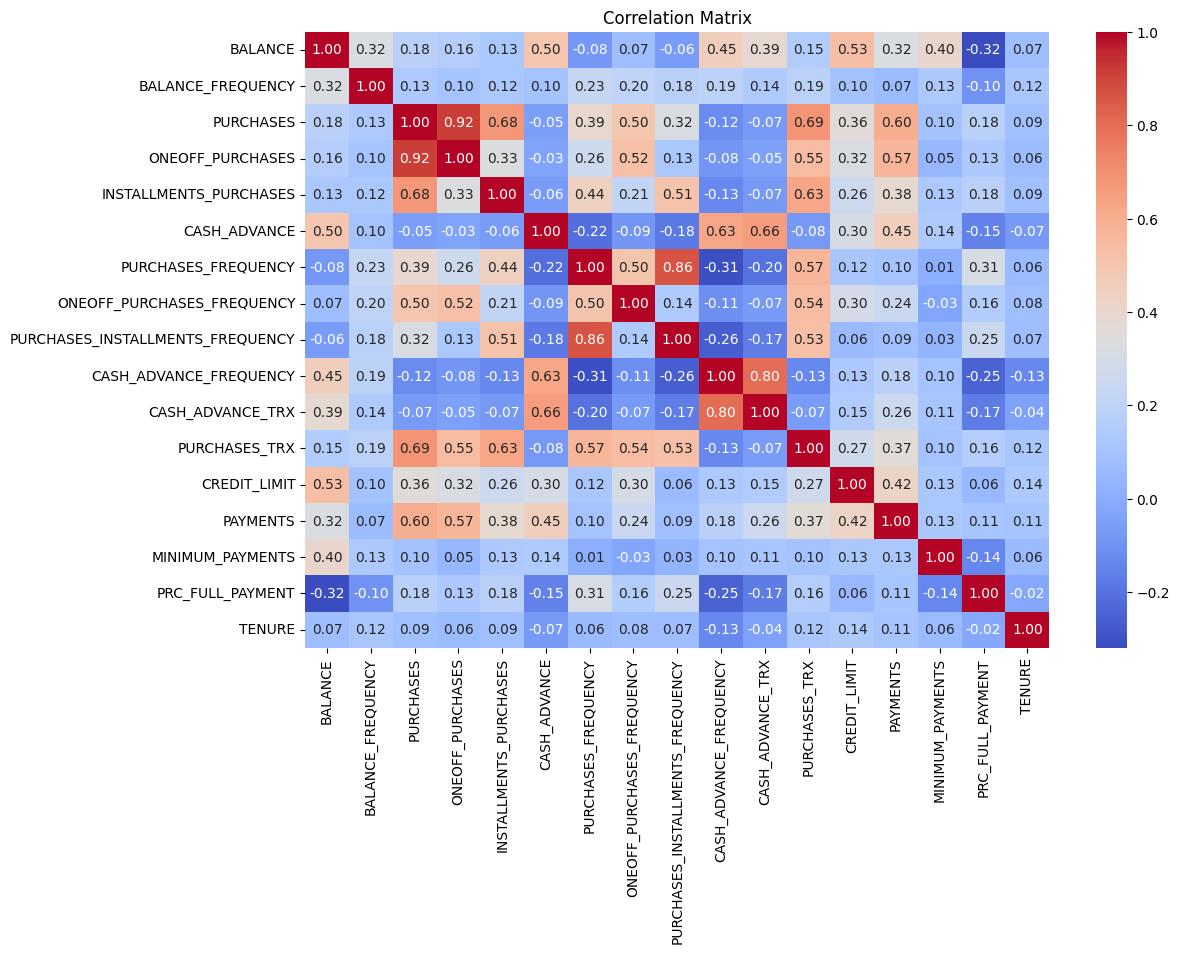

In [43]:
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

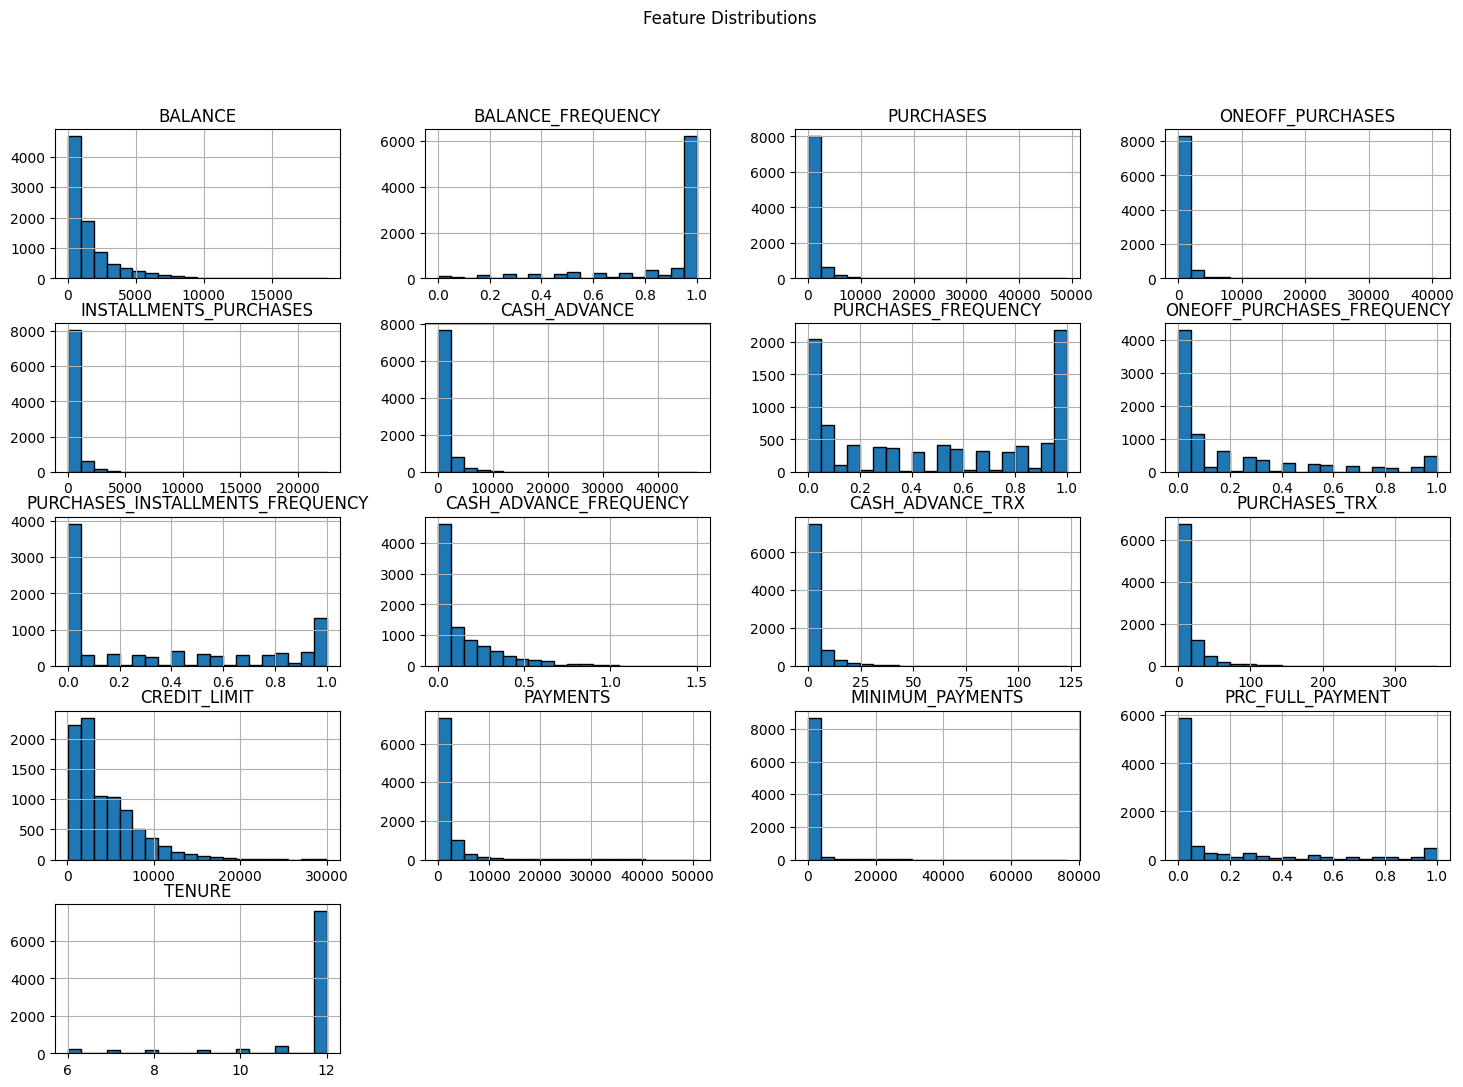

In [44]:
df_clustering.hist(figsize=(18, 12), bins=20, edgecolor='black')
plt.suptitle('Feature Distributions')
plt.show()



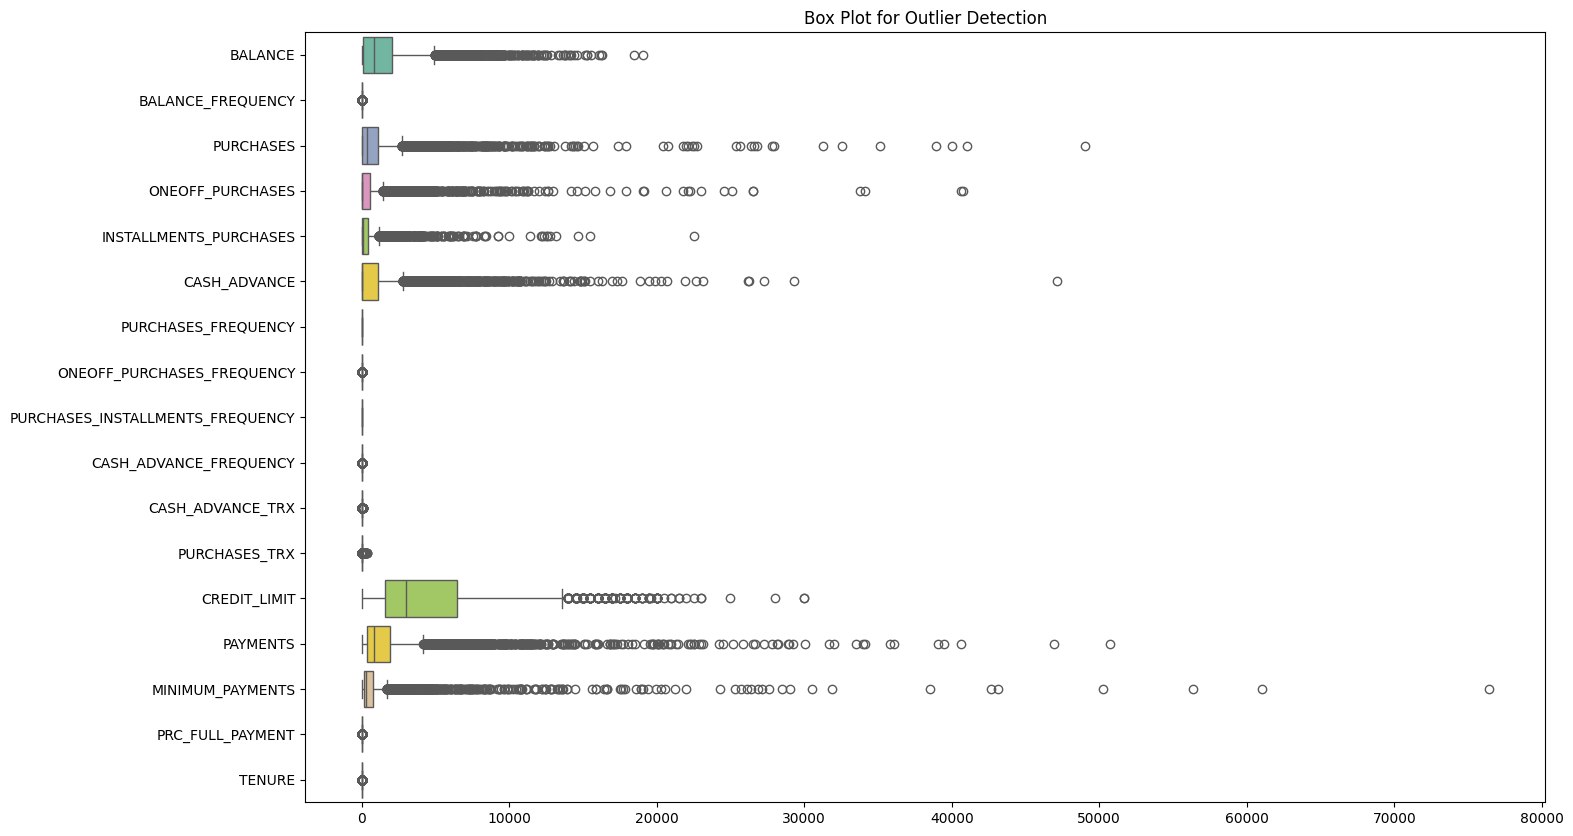

In [45]:
# Box plots for outlier detection
plt.figure(figsize=(16, 10))
sns.boxplot(data = df_clustering, orient='h', palette="Set2")
plt.title('Box Plot for Outlier Detection')
plt.show()

In [46]:
# Capping outliers at the 1st and 95th percentiles for relevant columns
def cap_outliers(df, cols):
    for col in cols:
        q_low = df[col].quantile(0.01)
        q_high = df[col].quantile(0.95)
        df[col] = df[col].clip(lower=q_low, upper=q_high)
    return df

In [47]:
# List of columns where outliers should be capped
cols_to_cap = ['BALANCE', 'PURCHASES', 'CASH_ADVANCE', 'PAYMENTS', 'CREDIT_LIMIT', 'MINIMUM_PAYMENTS']

In [48]:
df_capped = cap_outliers(df_clustering, cols_to_cap)

In [49]:
df_capped

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.00,0.00,0.00,4647.169122,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,312.343947,0.000000,12
4,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6
8946,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,312.343947,0.000000,6
8947,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6
8948,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6


In [50]:
df_filled = df_capped.fillna(df_capped.median())

# Feature engineering (Log Scaling and Interaction Features)
df_filled['LOG_BALANCE'] = np.log1p(df_filled['BALANCE'])
df_filled['LOG_CASH_ADVANCE'] = np.log1p(df_filled['CASH_ADVANCE'])
df_filled['LOG_PURCHASES'] = np.log1p(df_filled['PURCHASES'])
df_filled['PURCHASES_BALANCE_RATIO'] = df_filled['PURCHASES'] / df_filled['BALANCE']
df_filled['PAYMENTS_CREDIT_LIMIT_RATIO'] = df_filled['PAYMENTS'] / df_filled['CREDIT_LIMIT']

In [51]:
# Dropping the 'TENURE' for clustering purposes
df_clustering = df_filled.drop(columns=['TENURE'])

In [52]:
df_clustering

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,...,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,LOG_BALANCE,LOG_CASH_ADVANCE,LOG_PURCHASES,PURCHASES_BALANCE_RATIO,PAYMENTS_CREDIT_LIMIT_RATIO
0,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,...,2,1000.0,201.802084,139.509787,0.000000,3.735304,0.000000,4.568506,2.332476,0.201802
1,3202.467416,0.909091,0.00,0.00,0.00,4647.169122,0.000000,0.000000,0.000000,0.250000,...,0,7000.0,4103.032597,1072.340217,0.222222,8.071989,8.444229,0.000000,0.000000,0.586148
2,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,...,12,7500.0,622.066742,627.284787,0.000000,7.822504,0.000000,6.651791,0.309869,0.082942
3,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,...,1,7500.0,0.000000,312.343947,0.000000,7.419183,5.331694,7.313220,0.899398,0.000000
4,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,...,1,1200.0,678.334763,244.791237,0.000000,6.707735,0.000000,2.833213,0.019567,0.565279
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,...,6,1000.0,325.594462,48.886365,0.500000,3.384170,0.000000,5.677165,10.217061,0.325594
8946,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,...,6,1000.0,275.861322,312.343947,0.000000,3.004851,0.000000,5.707110,15.638672,0.275861
8947,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,...,5,1000.0,81.270775,82.418369,0.250000,3.194529,0.000000,4.979489,6.171290,0.081271
8948,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,...,0,500.0,52.549959,55.755628,0.250000,2.671218,3.625907,0.000000,0.000000,0.105100


In [53]:
# Check if the columns exist before dropping
print(df_clustering.columns)

# Removing original columns after log transformations and interaction features are created
columns_to_remove = ['BALANCE', 'PURCHASES', 'CASH_ADVANCE', 'PAYMENTS', 'CREDIT_LIMIT']
df_cleaned = df_clustering.drop(columns=columns_to_remove, errors='ignore')  # Ignore errors if columns don't exist




Index(['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES',
       'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'PURCHASES_FREQUENCY',
       'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY',
       'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX',
       'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT',
       'LOG_BALANCE', 'LOG_CASH_ADVANCE', 'LOG_PURCHASES',
       'PURCHASES_BALANCE_RATIO', 'PAYMENTS_CREDIT_LIMIT_RATIO'],
      dtype='object')


In [54]:
# Keep only the interaction terms and other important features
df_cleaned.head()

,BALANCE_FREQUENCY,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,LOG_BALANCE,LOG_CASH_ADVANCE,LOG_PURCHASES,PURCHASES_BALANCE_RATIO,PAYMENTS_CREDIT_LIMIT_RATIO
0,0.818182,0.00,95.4,0.166667,0.000000,0.083333,0.000000,0,2,139.509787,0.000000,3.735304,0.000000,4.568506,2.332476,0.201802
1,0.909091,0.00,0.0,0.000000,0.000000,0.000000,0.250000,4,0,1072.340217,0.222222,8.071989,8.444229,0.000000,0.000000,0.586148
2,1.000000,773.17,0.0,1.000000,1.000000,0.000000,0.000000,0,12,627.284787,0.000000,7.822504,0.000000,6.651791,0.309869,0.082942
3,0.636364,1499.00,0.0,0.083333,0.083333,0.000000,0.083333,1,1,312.343947,0.000000,7.419183,5.331694,7.313220,0.899398,0.000000
4,1.000000,16.00,0.0,0.083333,0.083333,0.000000,0.000000,0,1,244.791237,0.000000,6.707735,0.000000,2.833213,0.019567,0.565279


In [55]:
df_clustering = df_cleaned

In [56]:
df_clustering.head()

,BALANCE_FREQUENCY,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,LOG_BALANCE,LOG_CASH_ADVANCE,LOG_PURCHASES,PURCHASES_BALANCE_RATIO,PAYMENTS_CREDIT_LIMIT_RATIO
0,0.818182,0.00,95.4,0.166667,0.000000,0.083333,0.000000,0,2,139.509787,0.000000,3.735304,0.000000,4.568506,2.332476,0.201802
1,0.909091,0.00,0.0,0.000000,0.000000,0.000000,0.250000,4,0,1072.340217,0.222222,8.071989,8.444229,0.000000,0.000000,0.586148
2,1.000000,773.17,0.0,1.000000,1.000000,0.000000,0.000000,0,12,627.284787,0.000000,7.822504,0.000000,6.651791,0.309869,0.082942
3,0.636364,1499.00,0.0,0.083333,0.083333,0.000000,0.083333,1,1,312.343947,0.000000,7.419183,5.331694,7.313220,0.899398,0.000000
4,1.000000,16.00,0.0,0.083333,0.083333,0.000000,0.000000,0,1,244.791237,0.000000,6.707735,0.000000,2.833213,0.019567,0.565279


In [57]:
from sklearn.preprocessing import StandardScaler

In [58]:
scaler = StandardScaler()
df_normalized = scaler.fit_transform(df_clustering)

In [59]:
# Convert the normalized data back into a DataFrame with column names
df_normalized = pd.DataFrame(df_normalized, columns=df_clustering.columns)

In [60]:
df_normalized.head()

,BALANCE_FREQUENCY,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,LOG_BALANCE,LOG_CASH_ADVANCE,LOG_PURCHASES,PURCHASES_BALANCE_RATIO,PAYMENTS_CREDIT_LIMIT_RATIO
0,-0.249434,-0.356934,-0.349079,-0.806490,-0.678661,-0.707313,-0.675349,-0.476070,-0.511333,-0.686444,-0.525551,-1.211578,-0.933543,-0.106248,-0.062390,-0.437244
1,0.134325,-0.356934,-0.454576,-1.221758,-0.678661,-0.916995,0.573963,0.110074,-0.591796,0.624058,0.234227,0.966505,1.457528,-1.690563,-0.065830,0.291805
2,0.518084,0.108889,-0.454576,1.269843,2.673451,-0.916995,-0.675349,-0.476070,-0.109020,-0.001186,-0.525551,0.841202,-0.933543,0.616216,-0.065373,-0.662704
3,-1.016953,0.546189,-0.454576,-1.014125,-0.399319,-0.916995,-0.258913,-0.329534,-0.551565,-0.443635,-0.525551,0.638635,0.576182,0.845593,-0.064503,-0.820034
4,0.518084,-0.347294,-0.454576,-1.014125,-0.399319,-0.916995,-0.675349,-0.476070,-0.551565,-0.538538,-0.525551,0.281314,-0.933543,-0.708031,-0.065801,0.252220


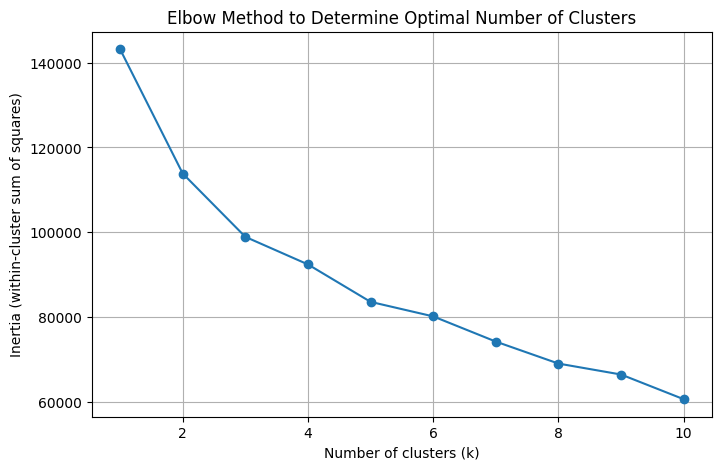

In [61]:
# Performing the Elbow Method to find the optimal number of clusters
inertias = []

# Running K-Means for different numbers of clusters (from 1 to 10) and storing the inertia
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_normalized)
    inertias.append(kmeans.inertia_)

# Plotting the elbow curve to visualize the optimal number of clusters
plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), inertias, marker='o')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia (within-cluster sum of squares)')
plt.title('Elbow Method to Determine Optimal Number of Clusters')
plt.grid(True)
plt.show()

In [62]:
# Applying K-Means clustering with 3 clusters
kmeans = KMeans(n_clusters=3, random_state=42)
df_normalized['Cluster'] = kmeans.fit_predict(df_normalized)

# Displaying the cluster assignments
df_normalized['Cluster'].value_counts()

Cluster
1    3408
2    3192
0    2350
Name: count, dtype: int64

Let's break down the interpretation of each cluster in more detail,

Cluster 0: Cash-Heavy, Low-Purchase Users
Balance Frequency (0.2078): This cluster has a moderately positive balance frequency, meaning that customers in this group are somewhat consistent in balancing their credit card account, but not as much as other groups.
One-off Purchases (-0.2817) & Installment Purchases (-0.4021): Both negative values suggest that customers in this group make significantly fewer purchases, whether one-time or through installments. They likely avoid purchases that require larger commitments or staggered payments.
Purchases Frequency (-0.9058): This highly negative value indicates that this group rarely makes purchases using their credit cards. They could be infrequent users of their cards, possibly preferring other payment methods (e.g., debit cards, cash, or online payment apps).
One-off Purchases Frequency (-0.4719) & Purchases Installments Frequency (-0.7514): Again, both values are negative, confirming that customers in this group seldom engage in purchasing activity, whether through one-time transactions or installments.
Cash Advance Frequency (0.8278) & Cash Advance Transactions (0.5984): The significantly positive values here indicate that this cluster is highly reliant on cash advances, likely using their credit cards more as a short-term financing tool than for making purchases. These customers might use their cards primarily to access liquidity rather than to buy goods and services.
Minimum Payments (0.3271): This positive value indicates that these customers tend to make at least the minimum payment on their credit card, which might suggest that they struggle to pay off the full balance or prefer to delay repayment.
Full Payment (-0.4168): A negative value here suggests that customers in this group are less likely to fully pay off their credit card balances. They might be accumulating debt or carrying balances month to month, which could result in higher interest charges.
Log Balance (0.5878): This indicates that their credit card balances are relatively high. Combined with the low purchase frequency and reliance on cash advances, this may suggest that these customers use their cards for emergencies or short-term cash flow problems.
Log Cash Advance (1.0158): A very high value, reinforcing the fact that cash advances are a core feature of their credit card usage.
Purchases Transactions (-0.4997): Negative, confirming that these customers make fewer purchases compared to others.
Purchases Balance Ratio (-0.0657): Slightly negative, indicating that their purchases do not account for a significant portion of their balance. This aligns with their tendency to use the card for cash advances rather than for purchases.
Payments Credit Limit Ratio (0.0358): Slightly positive, indicating that their payments tend to be modest in relation to their credit limit, reinforcing that they may only make the minimum payment.
Summary of Cluster 0:
This group can be characterized as “cash-heavy, low-purchase users.” They rely heavily on cash advances and tend to make fewer purchases using their credit card. They are likely to make minimum payments and carry a balance, indicating potential financial strain or preference for liquidity. Credit card issuers might target these users with products offering lower interest rates on cash advances, or consider offering financial management tools to help them better handle their balance.

Cluster 1: Financially Conservative, Moderate Purchasers
Balance Frequency (-0.5069): A negative value here suggests that customers in this group don't frequently check or balance their credit card accounts, which could mean they are more passive in managing their credit or more disciplined, needing fewer checks.
One-off Purchases (-0.2015) & Installment Purchases (-0.1497): Slightly negative values suggest these customers make fewer purchases overall but not dramatically less. They may not prioritize spending through their credit cards.
Purchases Frequency (0.1156): This positive value suggests that these customers make purchases at a somewhat regular pace, though not as frequently as the most active users.
One-off Purchases Frequency (-0.2715) & Purchases Installments Frequency (0.1149): The mixed values here suggest that this group is not particularly reliant on installment purchases and makes fewer one-time large purchases compared to other clusters.
Cash Advance Frequency (-0.6304) & Cash Advance Transactions (-0.4568): Negative values suggest that this group rarely uses their credit card for cash advances. They are likely to use their credit cards more for purchases rather than as a source of liquidity.
Minimum Payments (-0.5474): The negative value indicates that customers in this group are less likely to only make the minimum payment. This suggests that they tend to pay more than the minimum, which aligns with responsible credit behavior.
Full Payment (0.3320): A positive value here suggests that many of these customers pay off their credit card balance in full, indicating they are financially disciplined and avoid carrying debt.
Log Balance (-0.8597): This negative value implies that customers in this cluster have relatively lower credit card balances, which is consistent with their tendency to pay off their balance more often.
Log Cash Advance (-0.8102): Another negative value, reinforcing that cash advances are not a significant part of their credit card usage.
Purchases Transactions (-0.2391): Slightly negative, suggesting that they are not highly frequent purchasers but still engage in moderate spending.
Purchases Balance Ratio (0.1028): Slightly positive, indicating that purchases make up a moderate proportion of their balance.
Payments Credit Limit Ratio (-0.2723): Negative, suggesting that their payments are smaller relative to their available credit, which might indicate they don’t use a large portion of their credit limit.
Summary of Cluster 1:
This cluster represents “financially conservative, moderate purchasers.” These customers make purchases somewhat regularly but are disciplined in paying off their balances. They rarely use cash advances and tend to make payments above the minimum, indicating responsible credit behavior. Credit card companies could offer rewards or incentives for full payment or spending on certain categories to engage them further.

Cluster 2: High-Activity, Purchases-Oriented Users

Balance Frequency (0.4558): Positive, indicating that this group frequently checks and manages their account balance. This is characteristic of active credit card users.
One-off Purchases (0.6774) & Installment Purchases (0.7660): Both highly positive values suggest that customers in this group make frequent one-time and installment purchases, indicating a high level of purchasing activity.
Purchases Frequency (1.0655): Very high, suggesting that these customers are frequent purchasers and likely engage in multiple transactions regularly.
One-off Purchases Frequency (1.0386) & Purchases Installments Frequency (0.8561): High values confirm that these customers are active in making both one-off and installment purchases.
Cash Advance Frequency (-0.2089) & Cash Advance Transactions (-0.1495): Negative values show that cash advances are not a significant part of this cluster’s behavior, indicating that they use their credit cards primarily for purchases.
Minimum Payments (0.3522): A slightly positive value, suggesting that they are likely to make minimum payments but also pay more when possible.
Full Payment (0.0839): A slightly positive value indicates some propensity to fully pay off balances, though not as high as in Cluster 1.
Log Balance (0.4523): Positive, indicating that this group carries a balance, though it may not be as high as in Cluster 0. Their high purchasing activity likely contributes to this.
Log Cash Advance (-0.2029): Negative, confirming that this cluster is not reliant on cash advances.
Purchases Transactions (1.0293): Strongly positive, suggesting that this group is very active in making transactions.
Purchases Balance Ratio (-0.0604): Slightly negative, indicating that purchases account for a smaller proportion of their balance than expected. This could mean that other factors, like interest or fees, might contribute to their balances.
Payments Credit Limit Ratio (0.3481): This positive value suggests that these customers make payments that are a relatively high proportion of their available credit limit, showing that they manage their credit usage well.

Summary of Cluster 2:

This cluster represents “high-activity, purchases-oriented users.” These customers make frequent purchases and manage their credit card accounts actively, but they are less reliant on cash advances. They are likely to carry some balances, but they make regular payments and may not be as focused on paying off their full balance each month. These customers could be targeted with rewards programs that incentivize frequent spending, installment payments, and travel or luxury rewards.

Business Insights:
Cluster 0: These customers might benefit from financial literacy programs, balance transfer options, or products that reduce the cost of cash advances.
Cluster 1: This group may respond well to cashback or rewards for responsible usage, especially for customers who pay off balances in full.
Cluster 2: Offering tailored rewards for high-spending categories, luxury items, or frequent purchases could deepen engagement with this cluster. They may also be interested in installment payment plans for large purchases.
Each cluster has distinct needs and behaviors, allowing for customized strategies in product development, marketing, and customer engagement.

In [63]:
from sklearn.metrics import silhouette_score

# Calculating the silhouette score 
silhouette = silhouette_score(df_normalized.drop(columns=['Cluster']), df_normalized['Cluster'])

# Displaying the silhouette score
silhouette


0.21731972073137074

In [64]:
from sklearn.metrics import davies_bouldin_score, calinski_harabasz_score

In [65]:
davies_bouldin_score_avg = davies_bouldin_score(df_normalized.drop(columns=['Cluster']), df_normalized['Cluster'])

# Displaying the silhouette score
davies_bouldin_score_avg

1.6987910765747773

In [66]:
calinski_harabasz_score_avg = calinski_harabasz_score(df_normalized.drop(columns=['Cluster']), df_normalized['Cluster'])

# Displaying the silhouette score
calinski_harabasz_score_avg

2003.5057247587856

In [67]:
from sklearn.decomposition import PCA 

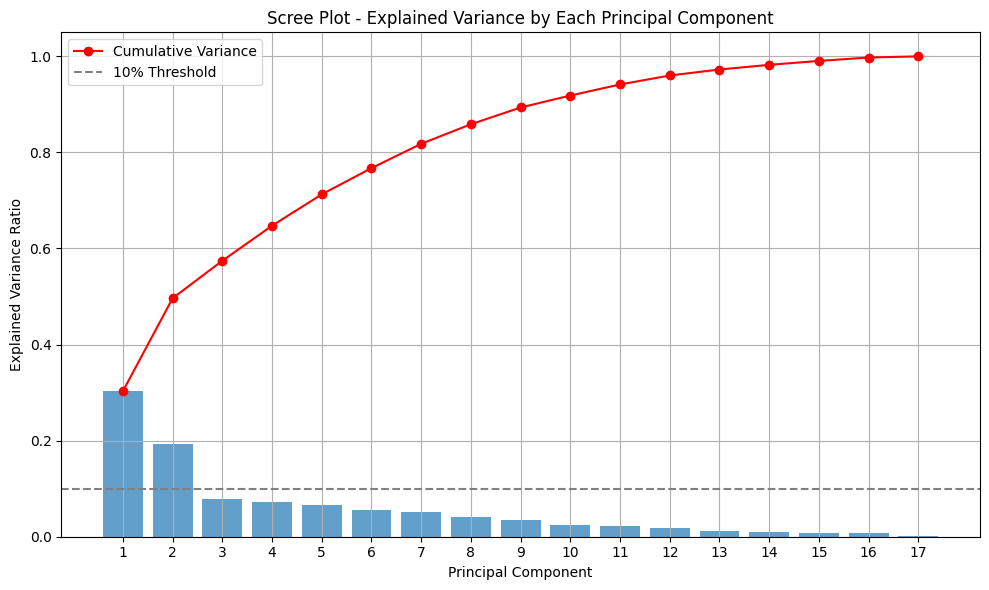

In [79]:
# scree plot
pca= PCA()
pca.fit(df_normalized)

# Scree Plot (Explained Variance for Each Component)
plt.figure(figsize=(10, 6))
plt.bar(range(1, len(pca_full.explained_variance_ratio_)+1), pca_full.explained_variance_ratio_, alpha=0.7)
plt.plot(range(1, len(pca_full.explained_variance_ratio_)+1), np.cumsum(pca_full.explained_variance_ratio_), 
         marker='o', color='red', label='Cumulative Variance')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.title('Scree Plot - Explained Variance by Each Principal Component')
plt.xticks(range(1, len(pca_full.explained_variance_ratio_)+1))
plt.axhline(y=0.1, color='gray', linestyle='--', label='10% Threshold')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [84]:
pca = PCA(n_components=2)
df_pca = pca.fit_transform(df_normalized)

#Apply K-Means on PCA-reduced data
kmeans_pca = KMeans(n_clusters=3, random_state=42)
cluster_labels_kmeans_pca = kmeans_pca.fit_predict(df_pca)

# Calculate the Silhouette Score for K-Means on PCA-reduced data
silhouette_kmeans_pca = silhouette_score(df_pca, cluster_labels_kmeans_pca)
print(f"Silhouette Score for K-Means on PCA-reduced data: {silhouette_kmeans_pca}")

davies_bouldin_score_kmeans_pca = davies_bouldin_score(df_pca, cluster_labels_kmeans_pca)
print(f"Davies-Bouldin for K-Means on PCA-reduced data: {davies_bouldin_score_kmeans_pca}")

calinski_harabasz_score_kmeans_pca = calinski_harabasz_score(df_pca, cluster_labels_kmeans_pca)
print(f"calinski harabasz for K-Means on PCA-reduced data: {calinski_harabasz_score_kmeans_pca}")


Silhouette Score for K-Means on PCA-reduced data: 0.44206625022810137
Davies-Bouldin for K-Means on PCA-reduced data: 0.8337420626100139
calinski harabasz for K-Means on PCA-reduced data: 8508.829015176287


Silhouette Score for K-Means on PCA-reduced data: 0.2736461231412095
Davies-Bouldin for K-Means on PCA-reduced data: 1.4583132187298427
calinski harabasz for K-Means on PCA-reduced data: 2791.646095199192


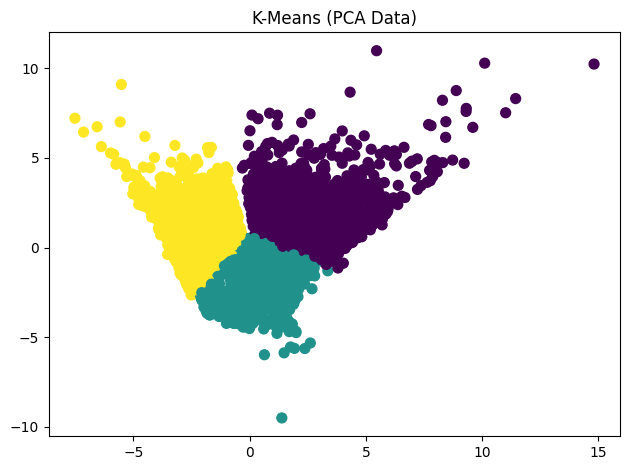

In [82]:
pca = PCA(n_components=8)
df_pca = pca.fit_transform(df_normalized)

# Step 13: Apply K-Means on PCA-reduced data
kmeans_pca = KMeans(n_clusters=3, random_state=42)
cluster_labels_kmeans_pca = kmeans_pca.fit_predict(df_pca)

# Step 14: Calculate the Silhouette Score for K-Means on PCA-reduced data
silhouette_kmeans_pca = silhouette_score(df_pca, cluster_labels_kmeans_pca)
print(f"Silhouette Score for K-Means on PCA-reduced data: {silhouette_kmeans_pca}")

davies_bouldin_score_kmeans_pca = davies_bouldin_score(df_pca, cluster_labels_kmeans_pca)
print(f"Davies-Bouldin for K-Means on PCA-reduced data: {davies_bouldin_score_kmeans_pca}")

calinski_harabasz_score_kmeans_pca = calinski_harabasz_score(df_pca, cluster_labels_kmeans_pca)
print(f"calinski harabasz for K-Means on PCA-reduced data: {calinski_harabasz_score_kmeans_pca}")



### Visualizations ###


# Plot K-Means (PCA Data)
plt.subplot()
plt.scatter(df_pca[:, 0], df_pca[:, 1], c=cluster_labels_kmeans_pca, cmap='viridis', s=50)
plt.title('K-Means (PCA Data)')


plt.tight_layout()
plt.show()


In [70]:
cluster_labels_kmeans_pca

array([1, 0, 2, ..., 1, 1, 1])

In [71]:
# Create a DataFrame from the original features and append cluster labels
df_original_with_clusters = pd.DataFrame(df_normalized, columns=df_normalized.columns)
df_original_with_clusters['Cluster_KMeans_PCA'] = cluster_labels_kmeans_pca

# Calculate the mean of each feature for each cluster
cluster_summary = df_original_with_clusters.groupby('Cluster_KMeans_PCA').mean()

# Display the cluster summary
print("Cluster Summary (Original Feature Space):")
print(cluster_summary)


Cluster Summary (Original Feature Space):
                    BALANCE_FREQUENCY  ONEOFF_PURCHASES  \
Cluster_KMeans_PCA                                        
0                            0.217642         -0.281429   
1                           -0.519008         -0.201274   
2                            0.456862          0.670845   

                    INSTALLMENTS_PURCHASES  PURCHASES_FREQUENCY  \
Cluster_KMeans_PCA                                                
0                                -0.401758            -0.904210   
1                                -0.158385             0.105991   
2                                 0.771199             1.066906   

                    ONEOFF_PURCHASES_FREQUENCY  \
Cluster_KMeans_PCA                               
0                                    -0.471094   
1                                    -0.266492   
2                                     1.021102   

                    PURCHASES_INSTALLMENTS_FREQUENCY  CASH_ADVANCE_FREQUENC

Detailed Interpretation of Clusters
Let’s break down each cluster in greater depth,

Cluster 0: Cash-Dependent, Low Purchase Activity, High Financial Risk
This cluster is characterized by customers who demonstrate a clear reliance on cash advances and exhibit low overall purchasing activity. Key points for deeper understanding:

Behavioral Insights:
Balance Frequency (0.216): These customers interact with their account balances slightly more than average, indicating some degree of active account management.
One-Off Purchases (-0.281) & One-Off Purchase Frequency (-0.471): These customers make fewer spontaneous, non-recurring purchases compared to the average customer. Their purchasing behavior is subdued, perhaps indicating budget constraints.
Installment Purchases (-0.402) & Installments Purchase Frequency (-0.751): They rarely use installment plans to finance their purchases. This suggests that they either do not have the financial flexibility to take on installment payments or they prefer cash advances as a financial tool.
Cash Advance Frequency (0.830) & Cash Advance Transactions (0.600): High levels of cash advances and frequent usage indicate that these customers often rely on short-term, high-interest loans to cover their expenses. This behavior is typically indicative of financial strain or limited access to other forms of credit.
Minimum Payments (0.331): Despite their high cash advance usage, they still manage to make moderate minimum payments, suggesting that they are trying to keep their accounts in good standing, albeit possibly only covering the bare minimum to avoid penalties.
Full Payment Ratio (-0.423): The low full payment ratio signals that they rarely pay off their credit card balances in full. Instead, they likely carry over balances, contributing to interest accrual and potentially compounding financial difficulties.
Financial Status:
Log Balance (0.593): These customers tend to have above-average account balances, which could indicate that they are accumulating debt rather than paying it down.
Log Cash Advance (1.015): They have taken out a significant amount of cash advances, further highlighting their financial distress.
Log Purchases (-0.949): Their total purchase amounts are relatively low, emphasizing that most of their credit usage is focused on accessing quick cash rather than purchasing goods or services.
Payments to Credit Limit Ratio (0.026): This near-average ratio suggests that they make just enough payments to avoid severe penalties, but are likely not reducing their overall debt levels significantly.

Business Implications:

Financial Education and Debt Management: These customers would benefit from financial literacy programs aimed at reducing reliance on cash advances and encouraging responsible credit usage. Introducing tools that help them better manage their finances, such as budgeting apps or financial counseling services, could improve their financial health.
Incentives for Full Payments: Offering incentives, like reduced interest rates or rewards for making full payments, might motivate this group to transition away from minimum payments and reduce their debt faster.
Credit Risk Management: This segment should be closely monitored due to their high risk of default. The business might consider tightening credit limits or offering lower-risk products such as prepaid cards to mitigate potential losses.
Cluster 1: Conservative Spenders, Financially Stable, Low Risk
This cluster represents customers who are financially cautious, rarely using credit beyond essential needs. They demonstrate responsible behavior and are low risk.

Behavioral Insights:
Balance Frequency (-0.517): These customers check their balances less frequently, which may indicate that they are confident in their financial management or they don’t rely heavily on their credit card for day-to-day purchases.
One-Off Purchases (-0.201) & One-Off Purchase Frequency (-0.265): They make fewer one-off purchases, suggesting they are not impulsive spenders and are more likely to make planned, deliberate purchases.
Installment Purchases (-0.158) & Installments Purchase Frequency (0.102): They engage in installment purchases at an average rate, showing a moderate use of credit, likely for planned, larger purchases.
Cash Advance Frequency (-0.628) & Cash Advance Transactions (-0.455): Their low reliance on cash advances demonstrates strong financial stability and a reluctance to take on high-interest loans.
Minimum Payments (-0.549): They tend to make fewer minimum payments, which suggests they are likely paying off their balances in full more often, avoiding interest charges and managing their debt responsibly.
Full Payment Ratio (0.331): A higher-than-average full payment ratio indicates they frequently settle their entire balance each month, further cementing their status as low-risk customers.
Financial Status:
Log Balance (-0.861): Their account balances are typically low, which is a good sign that they are not carrying large amounts of debt month to month.
Log Cash Advance (-0.803): They almost never use cash advances, reflecting their financial prudence and their preference for safer financial practices.
Log Purchases (0.271): Their purchase levels are close to average, showing they engage with their credit card in a measured way, likely for necessities or occasional purchases.
Payments to Credit Limit Ratio (-0.264): They make payments below the average in relation to their credit limit, but this is likely because they use their credit card conservatively and do not need to make large payments to cover substantial debts.
Business Implications:
Loyalty Programs and Rewards: This group is financially stable and could be incentivized to engage more with the credit card through targeted loyalty programs, rewards, or cashback offers that align with their spending habits (e.g., on planned purchases like travel or high-value goods).
Credit Line Increases: Offering credit line increases to this group may encourage more spending without increasing risk, as these customers are disciplined in their credit usage.
Upselling Financial Products: They may be receptive to upselling of other financial products, such as investment accounts, savings tools, or premium credit card options, given their financial stability and responsible behavior.
Cluster 2: High-Value, Frequent Purchasers, Active Credit Users
This cluster comprises customers who are highly engaged in credit card usage, both for purchases and for managing their finances. They represent an opportunity for growth and premium services.

Behavioral Insights:
Balance Frequency (0.456): These customers frequently check their balances, indicating a high level of engagement with their account. They are likely to actively manage their finances and make informed decisions about their spending.
One-Off Purchases (0.671) & One-Off Purchase Frequency (1.021): They make a large number of one-off purchases, indicating they are impulsive or frequent buyers, often using their credit card for discretionary spending.
Installment Purchases (0.772) & Installments Purchase Frequency (0.867): They are heavy users of installment payment options, which suggests they make larger purchases and prefer to spread payments over time, potentially to manage cash flow.
Cash Advance Frequency (-0.212) & Cash Advance Transactions (-0.151): Although they are frequent spenders, they do not rely on cash advances, which is a positive indicator of their financial stability and access to other forms of credit.
Minimum Payments (0.347): They make slightly higher minimum payments, possibly due to their higher overall spending, but this doesn’t necessarily indicate financial distress, as they may use revolving credit strategically.
Full Payment Ratio (0.093): Their average full payment ratio suggests they do not always pay off their balance in full, likely to take advantage of revolving credit to manage larger, planned purchases.
Financial Status:
Log Balance (0.446): They maintain higher balances, which could either reflect higher spending or strategic use of credit.
Log Cash Advance (-0.208): Their minimal use of cash advances supports the view that they are financially secure.
Log Purchases (0.890): Their purchase volume is high, showing they are highly engaged, frequent credit card users who likely derive significant value from rewards or cashback programs.
Payments to Credit Limit Ratio (0.348): They make larger payments relative to their credit limit, reflecting higher credit utilization but also indicating responsible credit management.
Business Implications:
Premium Credit Cards and Benefits: This group would likely benefit from premium credit card offerings with higher credit limits, enhanced rewards, and benefits such as travel perks, insurance, and exclusive access to events.
Targeted Marketing for Installment Plans: Given their high use of installment purchases, they might be responsive to promotions that offer 0% APR financing for large purchases or special installment plan offers.
Financial Health Tracking Tools: Providing advanced tools for tracking spending, optimizing rewards, and managing payments could strengthen engagement and loyalty among these high-value customers.
Conclusion:
Each cluster represents distinct customer behaviors and financial needs:

Cluster 0: High-risk, cash-dependent, and low-purchase customers who need financial education and tighter credit control.
Cluster 1: Financially stable, low-risk, conservative spenders who can be nurtured with loyalty programs and responsible credit limit increases.
Cluster 2: High-value, frequent spenders who would benefit from premium offerings and advanced financial tools.

By tailoring products, services, and communication strategies to these specific profiles, businesses can optimize customer satisfaction, retention, and profitability.

In [72]:
df_original_with_clusters['Cluster_KMeans_PCA'].value_counts()

Cluster_KMeans_PCA
1    3410
0    3182
2    2358
Name: count, dtype: int64

In [73]:
df_original_with_clusters.head()

,BALANCE_FREQUENCY,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,LOG_BALANCE,LOG_CASH_ADVANCE,LOG_PURCHASES,PURCHASES_BALANCE_RATIO,PAYMENTS_CREDIT_LIMIT_RATIO,Cluster,Cluster_KMeans_PCA
0,-0.249434,-0.356934,-0.349079,-0.806490,-0.678661,-0.707313,-0.675349,-0.476070,-0.511333,-0.686444,-0.525551,-1.211578,-0.933543,-0.106248,-0.062390,-0.437244,1,1
1,0.134325,-0.356934,-0.454576,-1.221758,-0.678661,-0.916995,0.573963,0.110074,-0.591796,0.624058,0.234227,0.966505,1.457528,-1.690563,-0.065830,0.291805,2,0
2,0.518084,0.108889,-0.454576,1.269843,2.673451,-0.916995,-0.675349,-0.476070,-0.109020,-0.001186,-0.525551,0.841202,-0.933543,0.616216,-0.065373,-0.662704,0,2
3,-1.016953,0.546189,-0.454576,-1.014125,-0.399319,-0.916995,-0.258913,-0.329534,-0.551565,-0.443635,-0.525551,0.638635,0.576182,0.845593,-0.064503,-0.820034,2,0
4,0.518084,-0.347294,-0.454576,-1.014125,-0.399319,-0.916995,-0.675349,-0.476070,-0.551565,-0.538538,-0.525551,0.281314,-0.933543,-0.708031,-0.065801,0.252220,1,1


Best DBSCAN Parameters on Original Data: {'eps': 0.3, 'min_samples': 7}
Best Silhouette Score for DBSCAN on Original Data: 0.21678826681272864
Silhouette Score for DBSCAN (Best Parameters) on Original Data: 0.21678826681272864
Davies-Bouldin Index for DBSCAN (Best Parameters) on Original Data: 0.9250654975947719
Calinski-Harabasz Index for DBSCAN (Best Parameters) on Original Data: 536.8798957618208


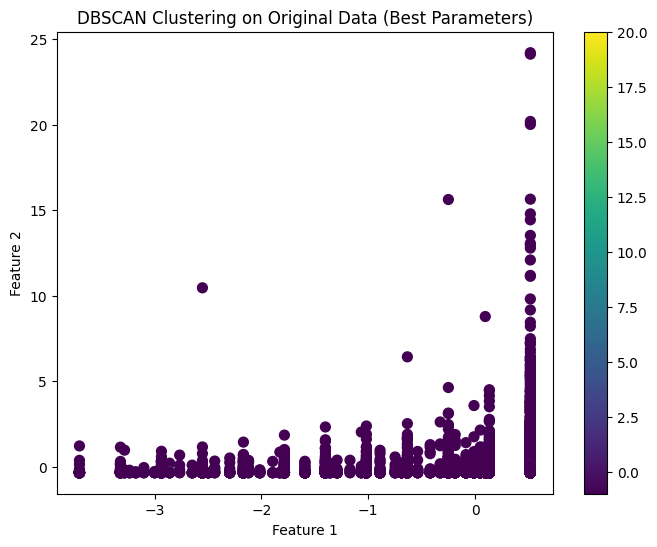

In [74]:
from sklearn.cluster import DBSCAN

# Define hyperparameter grid for DBSCAN tuning
param_grid = {
    'eps': [0.3, 0.5, 0.7, 0.9],  # Range of eps values to try
    'min_samples': [3, 5, 7, 10]  # Range of min_samples values to try
}

# Initialize variables to track the best score and parameters
best_score_original = -1
best_params_original = None

# Hyperparameter tuning for DBSCAN on original normalized data
for eps in param_grid['eps']:
    for min_samples in param_grid['min_samples']:
        dbscan_original = DBSCAN(eps=eps, min_samples=min_samples)
        cluster_labels_dbscan_original = dbscan_original.fit_predict(df_normalized)
        
        # Check the number of clusters and exclude noise points
        valid_points_original = cluster_labels_dbscan_original != -1  # Exclude noise points (-1)
        n_clusters_original = len(np.unique(cluster_labels_dbscan_original)) - (1 if -1 in cluster_labels_dbscan_original else 0)
        
        if n_clusters_original > 1:  # Proceed only if there are more than 1 cluster
            silhouette_original = silhouette_score(df_normalized[valid_points_original], cluster_labels_dbscan_original[valid_points_original])
            
            # Update best score and parameters
            if silhouette_original > best_score_original:
                best_score_original = silhouette_original
                best_params_original = {'eps': eps, 'min_samples': min_samples}

print(f"Best DBSCAN Parameters on Original Data: {best_params_original}")
print(f"Best Silhouette Score for DBSCAN on Original Data: {best_score_original}")

# Apply DBSCAN with the best parameters
dbscan_best_original = DBSCAN(eps=best_params_original['eps'], min_samples=best_params_original['min_samples'])
cluster_labels_dbscan_original = dbscan_best_original.fit_predict(df_normalized)

# Calculate Evaluation Metrics for DBSCAN (Original data)
valid_points_original = cluster_labels_dbscan_original != -1  # Exclude noise points (-1)

if valid_points_original.sum() > 0:  # Check if there are valid points
    # Silhouette Score
    silhouette_dbscan_original = silhouette_score(df_normalized[valid_points_original], cluster_labels_dbscan_original[valid_points_original])
    print(f"Silhouette Score for DBSCAN (Best Parameters) on Original Data: {silhouette_dbscan_original}")

    # Davies-Bouldin Index
    davies_bouldin_dbscan_original = davies_bouldin_score(df_normalized[valid_points_original], cluster_labels_dbscan_original[valid_points_original])
    print(f"Davies-Bouldin Index for DBSCAN (Best Parameters) on Original Data: {davies_bouldin_dbscan_original}")
    
    # Calinski-Harabasz Index
    calinski_harabasz_dbscan_original = calinski_harabasz_score(df_normalized[valid_points_original], cluster_labels_dbscan_original[valid_points_original])
    print(f"Calinski-Harabasz Index for DBSCAN (Best Parameters) on Original Data: {calinski_harabasz_dbscan_original}")
else:
    print("DBSCAN did not find enough valid clusters.")

# Visualize DBSCAN Clusters on Original Data
plt.figure(figsize=(8, 6))
plt.scatter(df_normalized.iloc[:, 0], df_normalized.iloc[:, 1], c=cluster_labels_dbscan_original, cmap='viridis', s=50)
plt.title('DBSCAN Clustering on Original Data (Best Parameters)')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.colorbar()
plt.show()



Best DBSCAN Parameters on PCA-Reduced Data: {'eps': 0.7, 'min_samples': 7}
Best Silhouette Score for DBSCAN on PCA-Reduced Data: 0.5880839340159167
Silhouette Score for DBSCAN (Best Parameters) on PCA-Reduced Data: 0.5880839340159167
Davies-Bouldin Index for DBSCAN (Best Parameters) on PCA-Reduced Data: 0.35713104523354083
Calinski-Harabasz Index for DBSCAN (Best Parameters) on PCA-Reduced Data: 144.05765382011413


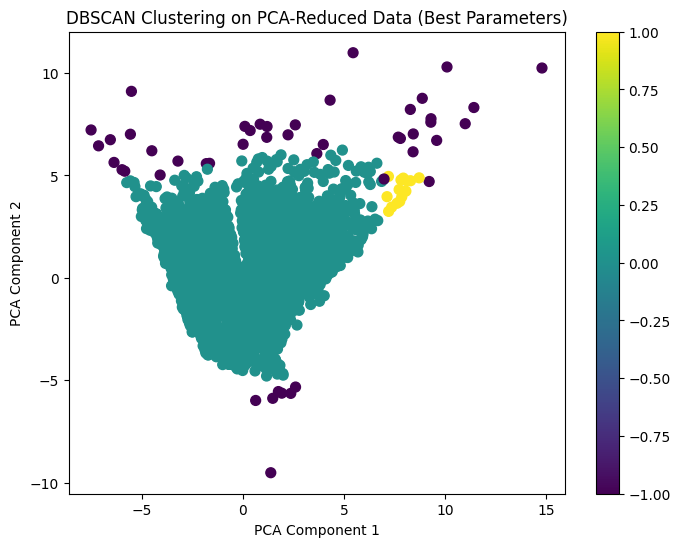

In [75]:
# Apply PCA to reduce dimensionality to 2 components
pca = PCA(n_components=2)
df_pca = pca.fit_transform(df_normalized)

# Define hyperparameter grid for DBSCAN tuning
param_grid = {
    'eps': [0.3, 0.5, 0.7, 0.9],
    'min_samples': [3, 5, 7, 10]
}

# Initialize variables to track the best score and parameters
best_score_pca = -1
best_params_pca = None

# Hyperparameter tuning for DBSCAN
for eps in param_grid['eps']:
    for min_samples in param_grid['min_samples']:
        dbscan_pca = DBSCAN(eps=eps, min_samples=min_samples)
        cluster_labels_dbscan_pca = dbscan_pca.fit_predict(df_pca)
        
        # Check the number of clusters and exclude noise points
        valid_points_pca = cluster_labels_dbscan_pca != -1  # Exclude noise points (-1)
        n_clusters_pca = len(np.unique(cluster_labels_dbscan_pca)) - (1 if -1 in cluster_labels_dbscan_pca else 0)
        
        if n_clusters_pca > 1:  # Proceed only if there are more than 1 cluster
            silhouette_pca = silhouette_score(df_pca[valid_points_pca], cluster_labels_dbscan_pca[valid_points_pca])
            
            # Update best score and parameters
            if silhouette_pca > best_score_pca:
                best_score_pca = silhouette_pca
                best_params_pca = {'eps': eps, 'min_samples': min_samples}

print(f"Best DBSCAN Parameters on PCA-Reduced Data: {best_params_pca}")
print(f"Best Silhouette Score for DBSCAN on PCA-Reduced Data: {best_score_pca}")

# Apply DBSCAN with the best parameters
dbscan_best_pca = DBSCAN(eps=best_params_pca['eps'], min_samples=best_params_pca['min_samples'])
cluster_labels_dbscan_pca = dbscan_best_pca.fit_predict(df_pca)

# Calculate Evaluation Metrics for DBSCAN (PCA-reduced data)
valid_points_pca = cluster_labels_dbscan_pca != -1  # Exclude noise points (-1)

if valid_points_pca.sum() > 0:  # Check if there are valid points
    silhouette_dbscan_pca = silhouette_score(df_pca[valid_points_pca], cluster_labels_dbscan_pca[valid_points_pca])
    davies_bouldin_dbscan_pca = davies_bouldin_score(df_pca[valid_points_pca], cluster_labels_dbscan_pca[valid_points_pca])
    calinski_harabasz_dbscan_pca = calinski_harabasz_score(df_pca[valid_points_pca], cluster_labels_dbscan_pca[valid_points_pca])
    
    print(f"Silhouette Score for DBSCAN (Best Parameters) on PCA-Reduced Data: {silhouette_dbscan_pca}")
    print(f"Davies-Bouldin Index for DBSCAN (Best Parameters) on PCA-Reduced Data: {davies_bouldin_dbscan_pca}")
    print(f"Calinski-Harabasz Index for DBSCAN (Best Parameters) on PCA-Reduced Data: {calinski_harabasz_dbscan_pca}")
else:
    print("DBSCAN did not find enough valid clusters.")

# Visualize DBSCAN Clusters on PCA-Reduced Data
plt.figure(figsize=(8, 6))
plt.scatter(df_pca[:, 0], df_pca[:, 1], c=cluster_labels_dbscan_pca, cmap='viridis', s=50)
plt.title('DBSCAN Clustering on PCA-Reduced Data (Best Parameters)')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.colorbar()
plt.show()


Silhouette Score for DBSCAN (Best Parameters) on PCA-Reduced Data: 0.6069551589503166
Davies-Bouldin Index for DBSCAN (Best Parameters) on PCA-Reduced Data: 0.343139802033735
Calinski-Harabasz Index for DBSCAN (Best Parameters) on PCA-Reduced Data: 145.11208248340435


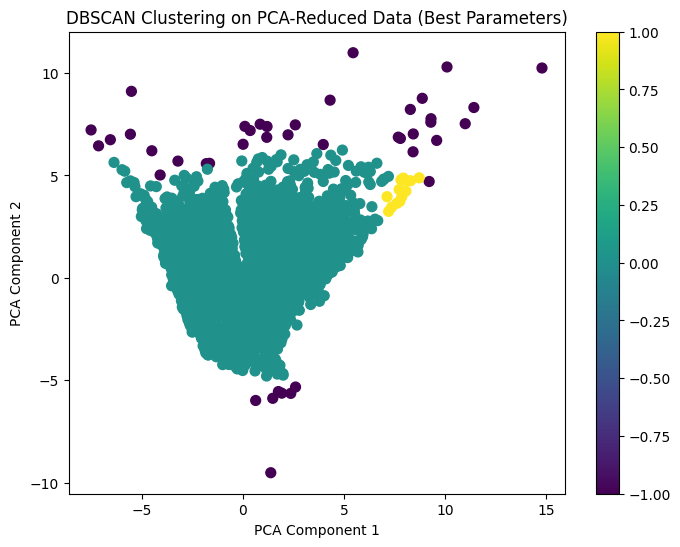

In [76]:
from sklearn.cluster import DBSCAN
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score
import numpy as np

# Remove cluster columns from df_normalized
df_normalized_cleaned = df_normalized.drop(columns=['Cluster', 'Cluster_KMeans_PCA'], errors='ignore')

# Apply PCA to reduce dimensionality to 2 components
pca = PCA(n_components=2)
df_pca_cleaned = pca.fit_transform(df_normalized_cleaned)

# Define hyperparameter grid for DBSCAN tuning
param_grid = {
    'eps': [0.3, 0.5, 0.7, 0.9],  # Range of eps values to try
    'min_samples': [3, 5, 7, 10]  # Range of min_samples values to try
}

# Initialize variables to track the best score and parameters
best_score_pca = -1
best_params_pca = None

# Hyperparameter tuning for DBSCAN on PCA-reduced data
for eps in param_grid['eps']:
    for min_samples in param_grid['min_samples']:
        dbscan_pca = DBSCAN(eps=eps, min_samples=min_samples)
        cluster_labels_dbscan_pca = dbscan_pca.fit_predict(df_pca_cleaned)
        
        # Check the number of clusters and exclude noise points
        valid_points_pca = cluster_labels_dbscan_pca != -1  # Exclude noise points (-1)
        n_clusters_pca = len(np.unique(cluster_labels_dbscan_pca)) - (1 if -1 in cluster_labels_dbscan_pca else 0)
        
        if n_clusters_pca > 1:  # Proceed only if there are more than 1 cluster
            silhouette_pca = silhouette_score(df_pca_cleaned[valid_points_pca], cluster_labels_dbscan_pca[valid_points_pca])
            
            # Update best score and parameters
            if silhouette_pca > best_score_pca:
                best_score_pca = silhouette_pca
                best_params_pca = {'eps': eps, 'min_samples': min_samples}

# Apply DBSCAN with the best parameters
dbscan_best_pca = DBSCAN(eps=best_params_pca['eps'], min_samples=best_params_pca['min_samples'])
cluster_labels_dbscan_pca = dbscan_best_pca.fit_predict(df_pca_cleaned)

# Calculate Evaluation Metrics for DBSCAN (PCA-reduced data)
valid_points_pca = cluster_labels_dbscan_pca != -1  # Exclude noise points (-1)

if valid_points_pca.sum() > 0:  # Check if there are valid points
    silhouette_dbscan_pca = silhouette_score(df_pca_cleaned[valid_points_pca], cluster_labels_dbscan_pca[valid_points_pca])
    davies_bouldin_dbscan_pca = davies_bouldin_score(df_pca_cleaned[valid_points_pca], cluster_labels_dbscan_pca[valid_points_pca])
    calinski_harabasz_dbscan_pca = calinski_harabasz_score(df_pca_cleaned[valid_points_pca], cluster_labels_dbscan_pca[valid_points_pca])

    print(f"Silhouette Score for DBSCAN (Best Parameters) on PCA-Reduced Data: {silhouette_dbscan_pca}")
    print(f"Davies-Bouldin Index for DBSCAN (Best Parameters) on PCA-Reduced Data: {davies_bouldin_dbscan_pca}")
    print(f"Calinski-Harabasz Index for DBSCAN (Best Parameters) on PCA-Reduced Data: {calinski_harabasz_dbscan_pca}")
else:
    print("DBSCAN did not find enough valid clusters.")
    
# Visualize DBSCAN Clusters on PCA-Reduced Data
plt.figure(figsize=(8, 6))
plt.scatter(df_pca[:, 0], df_pca[:, 1], c=cluster_labels_dbscan_pca, cmap='viridis', s=50)
plt.title('DBSCAN Clustering on PCA-Reduced Data (Best Parameters)')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.colorbar()
plt.show()    


In [77]:
import pandas as pd

# Create a DataFrame for PCA-reduced data and DBSCAN labels
df_pca_labeled = pd.DataFrame(df_pca_cleaned, columns=['PCA1', 'PCA2'])
df_pca_labeled['Cluster'] = cluster_labels_dbscan_pca

# Filter out noise points (labeled as -1)
df_clusters = df_pca_labeled[df_pca_labeled['Cluster'] != -1]

# Generate summary statistics for each cluster
cluster_summary = df_clusters.groupby('Cluster').mean()

# Display the cluster summary
print("Cluster Summary (PCA-Reduced Data):")
print(cluster_summary)


Cluster Summary (PCA-Reduced Data):
             PCA1      PCA2
Cluster                    
0       -0.024399 -0.030903
1        7.778309  4.503192


In [78]:
# Adding the cluster labels from DBSCAN (PCA-based) to the original data
df_normalized_cleaned['Cluster_DBSCAN_PCA'] = cluster_labels_dbscan_pca

# Filter out noise points (labelled as -1) before summarizing
df_clusters_original = df_normalized_cleaned[df_normalized_cleaned['Cluster_DBSCAN_PCA'] != -1]

# Grouping by clusters and generating the summary for each original feature
cluster_summary_original = df_clusters_original.groupby('Cluster_DBSCAN_PCA').mean()

# Display the cluster summary (this will show the mean of each feature for each cluster)
print("Cluster Summary (Original Data):")
print(cluster_summary_original)


Cluster Summary (Original Data):
                    BALANCE_FREQUENCY  ONEOFF_PURCHASES  \
Cluster_DBSCAN_PCA                                        
0                            0.000295         -0.031650   
1                            0.485612          6.574354   

                    INSTALLMENTS_PURCHASES  PURCHASES_FREQUENCY  \
Cluster_DBSCAN_PCA                                                
0                                -0.025837            -0.005084   
1                                 5.626155             1.234705   

                    ONEOFF_PURCHASES_FREQUENCY  \
Cluster_DBSCAN_PCA                               
0                                    -0.008558   
1                                     2.449977   

                    PURCHASES_INSTALLMENTS_FREQUENCY  CASH_ADVANCE_FREQUENCY  \
Cluster_DBSCAN_PCA                                                             
0                                          -0.005805               -0.005686   
1                   

Let's delve deeper into each feature and its interpretation for both clusters:

Cluster 0 (Low-Engagement or Dormant Customers)
This cluster shows minimal activity across almost all features. These could represent customers who are either inactive or are low spenders with little to no engagement with the credit card.

Balance Frequency (0.000295):
Customers in this cluster rarely update their card balance. This might indicate they do not frequently use their card or they maintain a low or zero balance.

One-Off Purchases (-0.031650):
The negative value suggests minimal or no large one-time purchases, which typically points to lower spending behavior or infrequent use of the card for big purchases.

Installments Purchases (-0.025837):
Similar to one-off purchases, these customers rarely engage in purchases made in installments, indicating they may not prefer installment-based payment plans.

Purchases Frequency (-0.005084):
A near-zero value here indicates that customers in this cluster make very few purchases, if any. This reflects low activity and engagement with their credit cards.

One-Off Purchases Frequency (-0.008558):
Again, this shows that these customers very rarely make one-off purchases, which reinforces the idea that this cluster has little spending behavior.

Purchases Installments Frequency (-0.005805):
The small negative value indicates that installment purchases are either non-existent or very rare for these customers.

Cash Advance Frequency (-0.005686) and Cash Advance Transactions (-0.018423):
Both of these features are near zero, indicating that customers in this cluster do not rely on cash advances. This further suggests minimal card activity.

Purchases Transactions (-0.026260):
This value implies a very low volume of transactions. These customers are likely to use their cards very sparingly, if at all.

Minimum Payments (-0.006035):
The low or negative value indicates that these customers are not making significant payments, potentially because they have minimal balances or don't use their cards enough to accrue large balances.

PRC Full Payment (-0.003347):
The low value here suggests customers in this cluster rarely make full payments. However, this might be a byproduct of them not using their cards much, hence having little to no balance to pay off.

Log Balance (-0.002913) and Log Cash Advance (-0.000434):
The close-to-zero balance values further indicate low card usage, as these customers tend to maintain very small or no balances on their accounts. There is also minimal or no use of cash advances.

Log Purchases (-0.005675) and Purchases Balance Ratio (-0.022177):
These figures indicate that their purchasing behavior results in small or non-existent balances on the card, reinforcing the inactivity of these customers.

Payments Credit Limit Ratio (-0.00222):
A value near zero implies that these customers are not making payments that significantly reflect their credit limit. This could be because they have small or no outstanding balances and are therefore not utilizing much of their available credit.

Overall Interpretation for Cluster 0:
This cluster likely represents customers who are disengaged or low-value in terms of credit card activity. They rarely make purchases, don’t use cash advances, and keep small or zero balances on their accounts. Their lack of engagement might indicate that they are either inactive or use the card very sparingly. These customers could benefit from re-engagement campaigns, offering incentives or rewards to encourage more card usage.

Cluster 1 (High-Engagement or Active Customers)
This cluster exhibits high levels of card activity across various metrics, making them high-value customers for the bank. Their behavior suggests they are frequent users of their credit cards and likely provide significant revenue through transactions and interest.

Balance Frequency (0.485612):
A positive and relatively high balance frequency indicates that customers in this cluster frequently update or change their card balance. This suggests they use their credit cards regularly, either by making purchases or payments.

One-Off Purchases (6.574354):
A large positive value shows these customers frequently make substantial one-time purchases, likely using the card for large or significant expenses, making them valuable to the business.

Installments Purchases (5.626155):
High installment purchases indicate these customers prefer using installment-based payments. They may be taking advantage of installment options offered by the bank, potentially for larger purchases, making them highly engaged.

Purchases Frequency (1.234705):
A positive value close to one suggests frequent purchases. These customers are regular users of their credit cards for everyday spending.

One-Off Purchases Frequency (2.449977):
The high value for one-off purchase frequency shows these customers engage in large purchases frequently, making them high-value customers with significant transactional volume.

Purchases Installments Frequency (1.399194):
This high value suggests that installment purchases occur regularly, reinforcing the idea that these customers use the card for both one-off and installment-based transactions.

Cash Advance Frequency (-0.675349) and Cash Advance Transactions (-0.476070):
These negative values suggest that while these customers are active spenders, they do not rely on cash advances. Their limited cash advance use could indicate they manage their finances well and don't need to borrow cash using this feature.

Purchases Transactions (5.814267):
A high number here indicates that customers in this cluster make many transactions, suggesting frequent and diverse spending.

Minimum Payments (-0.360272):
A negative but relatively high value implies that although these customers are engaged in high transaction volumes, they might not always make large payments. This could lead to rolling balances and accruing interest, which is profitable for the credit card provider.

PRC Full Payment (2.286759):
The high value suggests that these customers are more likely to make full payments, indicating that they have high liquidity and prefer to avoid carrying balances.

Log Balance (0.607755):
A positive balance shows that these customers maintain larger balances, reflecting their higher transactional volumes.

Log Cash Advance (-0.933543):
The negative value shows limited or no usage of cash advances, indicating customers in this cluster prefer to avoid this feature of their credit cards.

Log Purchases (1.185703):
This value suggests that the volume of purchases is substantial, making these customers high-value in terms of both spending and profitability for the bank.

Purchases Balance Ratio (-0.061747):
Although slightly negative, this indicates the balance related to purchases is somewhat manageable, possibly suggesting customers in this cluster maintain a good balance between spending and repayments.

Payments Credit Limit Ratio (0.56695):
A positive value indicates that these customers are using a substantial portion of their credit limit but are also likely making significant payments, which reflects well-managed finances.

Overall Interpretation for Cluster 1:
This cluster represents the bank’s high-value customers. They are frequent spenders, making both large one-off purchases and utilizing installment options. They manage their balances well, make full payments, and generally avoid cash advances. These customers are the most engaged and likely generate significant revenue for the bank through both transactions and interest.

Strategic Recommendations:
Cluster 0: Focus on re-engagement strategies, such as targeted offers, personalized marketing campaigns, or rewards to incentivize usage. Additionally, understanding why these customers are inactive may help tailor the approach (e.g., financial difficulties, competition, etc.).

Cluster 1: This cluster should receive offers tailored to their high spending habits, such as premium rewards programs, loyalty bonuses, or exclusive benefits that encourage continued or increased engagement. Keeping these customers satisfied is crucial for maintaining profitability.

Key Business Insights:

DBSCAN produces well-separated and distinct customer segments based on behavior, making it easier to identify and target different customer groups (high Silhouette and low Davies-Bouldin). These clusters could represent customer types like:
High-value customers (likely to spend more and be more responsive to premium offers).
Occasional customers who may respond to reactivation campaigns.
Cost-sensitive customers who might respond to discounts or loyalty incentives.

K-Means, with its high Calinski-Harabasz score, forms more tightly packed and defined clusters. If your business model demands precision and clear-cut segments, this could be advantageous for targeting:
High-precision promotions, where you want to maximize the ROI on marketing campaigns by targeting highly specific customer traits.
Upselling and cross-selling opportunities where similar customer types can be grouped to promote relevant products.

In Summary:

DBSCAN is better for identifying distinct customer groups and actionable outlier behavior (great for understanding diverse customer behaviors or detecting unique customer groups).

K-Means offers tighter, more defined clusters that can help businesses focusing on specific, homogeneous segments (great for precise marketing or product development targeting).

By leveraging these clustering insights, you can enhance marketing, product personalization, and customer retention strategies based on well-defined customer behaviors.